In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)

import dabl

## Importing Data

In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking Data Info

In [13]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df.sample(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
71,72,Female,47,49,42
11,12,Female,35,19,99
133,134,Female,31,72,71
88,89,Female,34,58,60


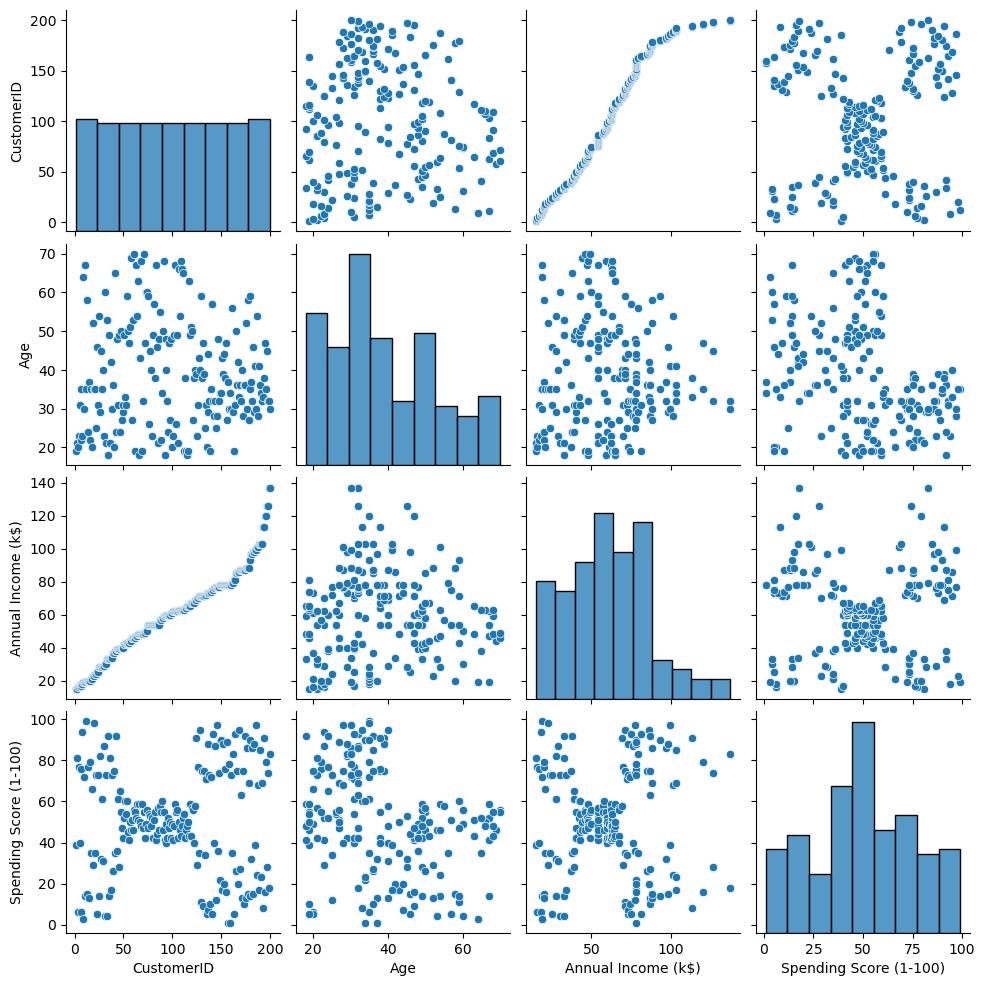

In [25]:
sns.pairplot(data=df)
plt.show()

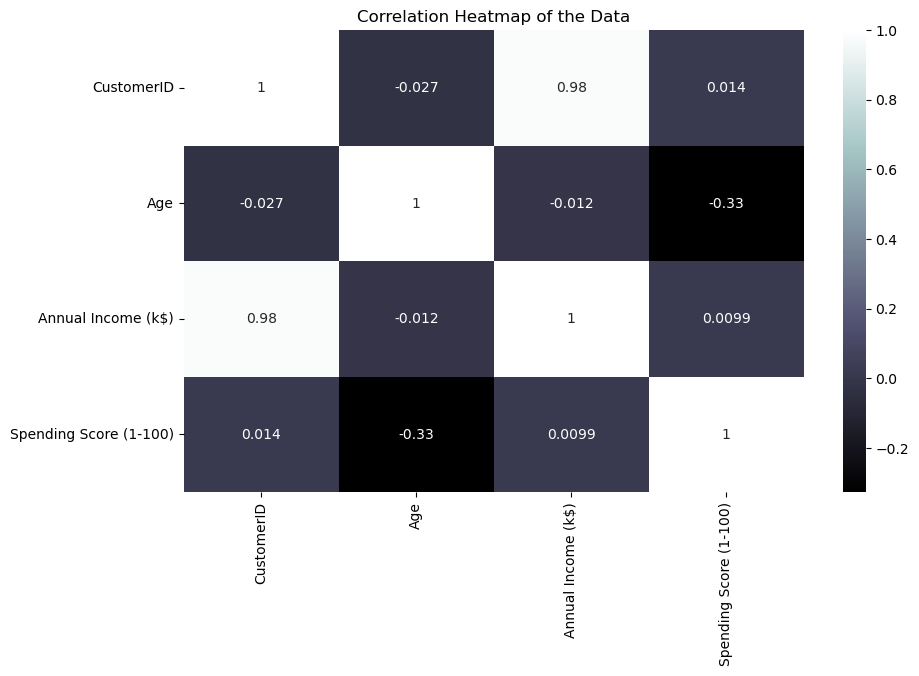

In [28]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='bone')
plt.title('Correlation Heatmap of the Data')
plt.xticks(rotation=90)
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.62E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

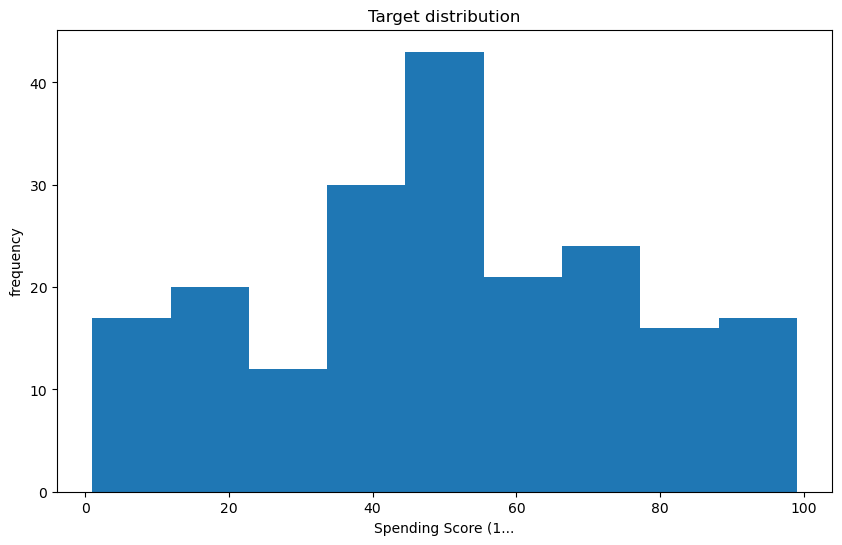

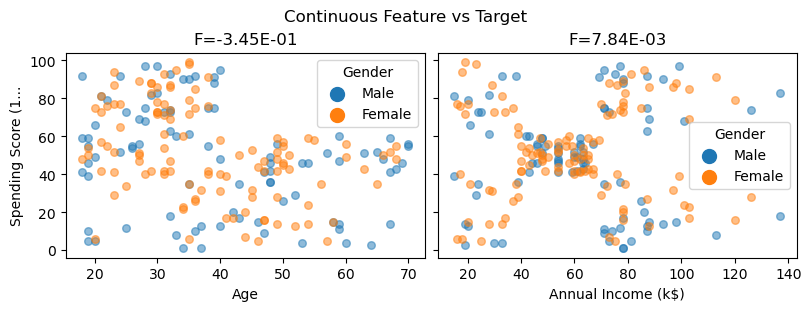

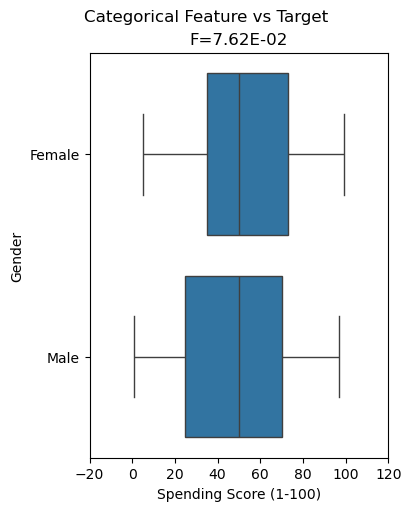

In [29]:
dabl.plot(df,target_col='Spending Score (1-100)')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

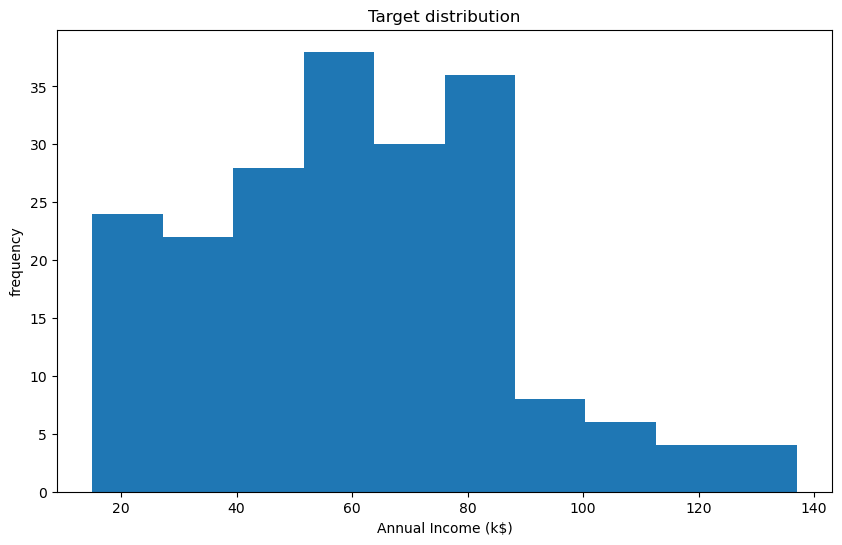

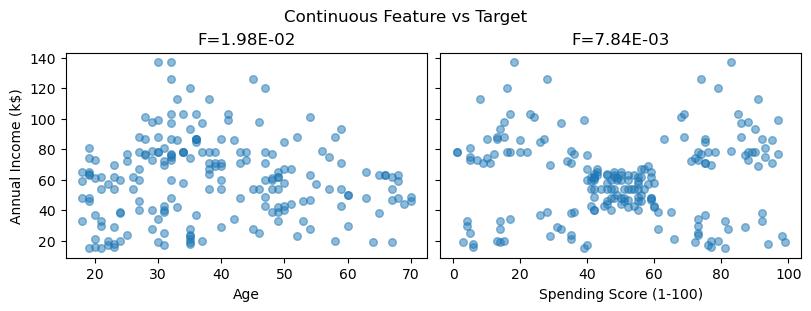

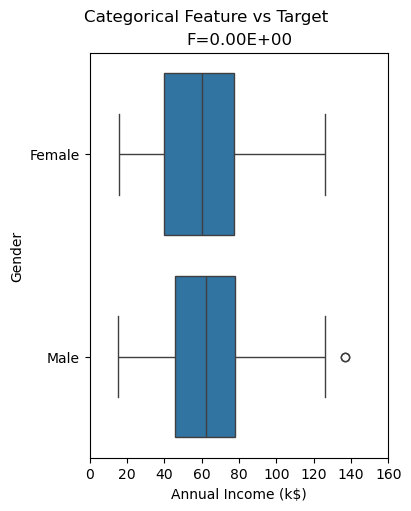

In [30]:
dabl.plot(df,target_col='Annual Income (k$))

In [31]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
df.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


In [34]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

In [37]:
df.columns = ['CustomerID','Gender','Age','AnnualIncome','SpendingScore']

In [38]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


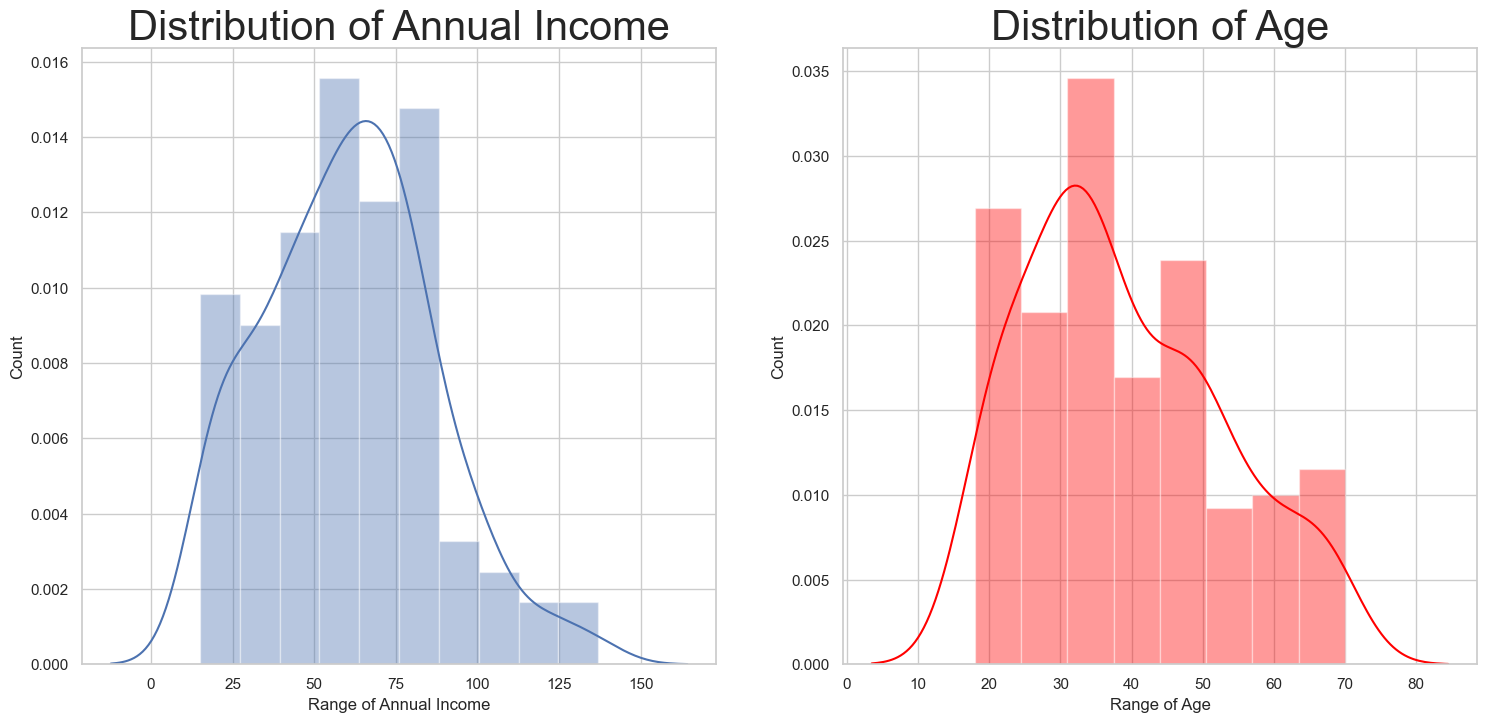

In [71]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df.AnnualIncome)
plt.title('Distribution of Annual Income',fontsize = 30)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df.Age,color='red')
plt.title('Distribution of Age',fontsize = 30)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [49]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

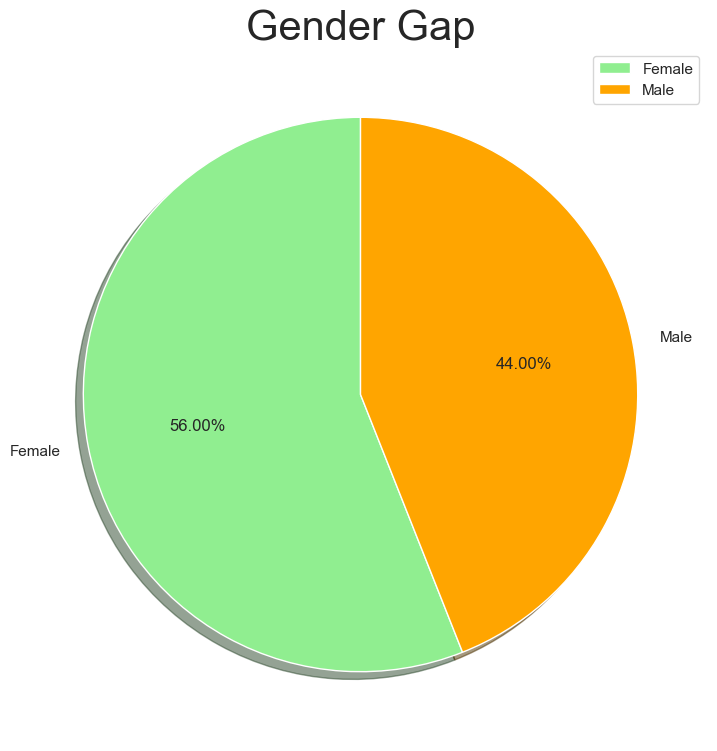

In [70]:
labels = ['Female','Male']
size = df.Gender.value_counts()
colors = ['lightgreen','orange']

plt.figure(figsize = (9,9))
plt.pie(size,colors=colors,labels=labels,startangle=90,autopct='%.2f%%',shadow=True)
plt.title('Gender Gap',fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

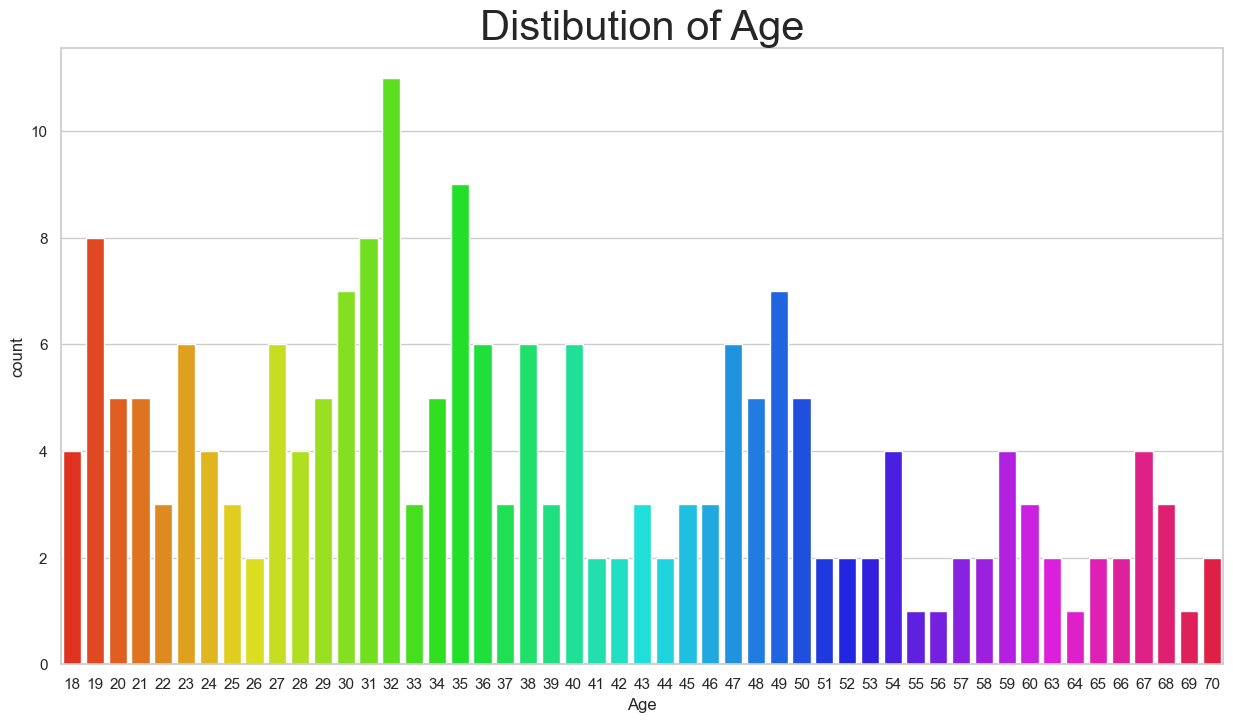

In [69]:
plt.figure(figsize = (15,8))
sns.countplot(x = df.Age, palette = 'hsv')
plt.title('Distibution of Age',fontsize = 30)
plt.show()

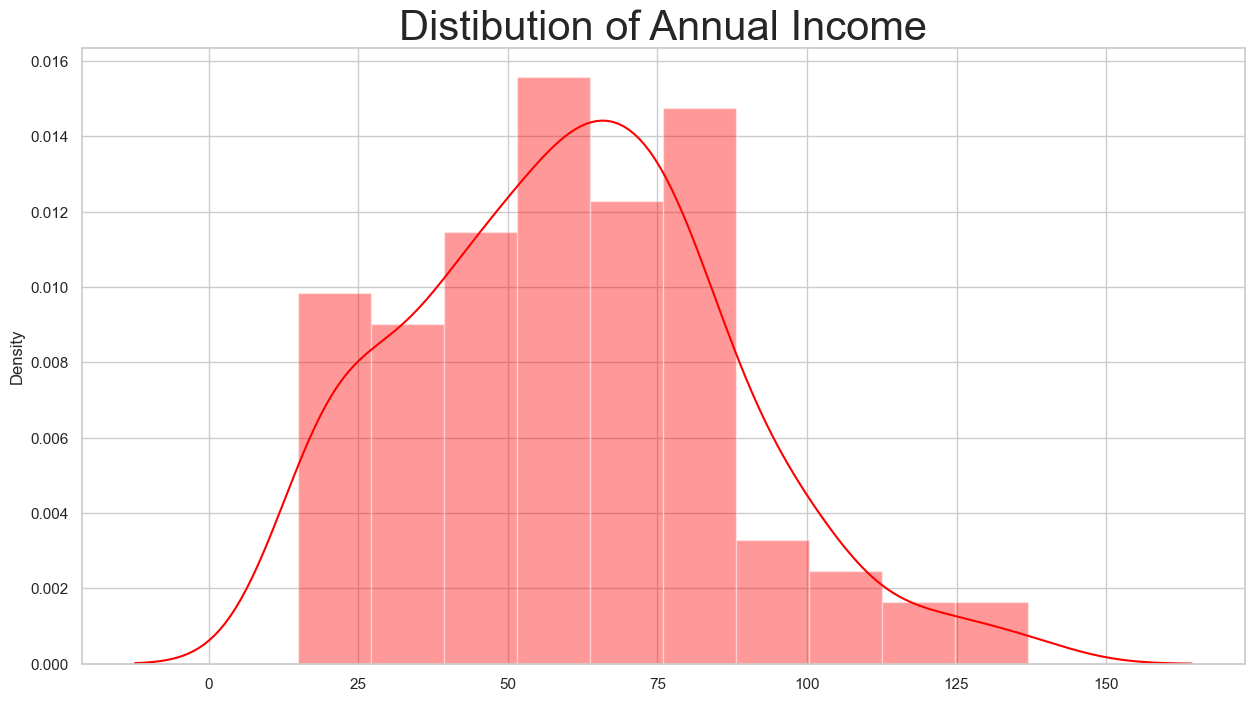

In [68]:
plt.figure(figsize = (15,8))
sns.distplot(x = df.AnnualIncome, color = 'red')
plt.title('Distibution of Annual Income',fontsize = 30)
plt.show()

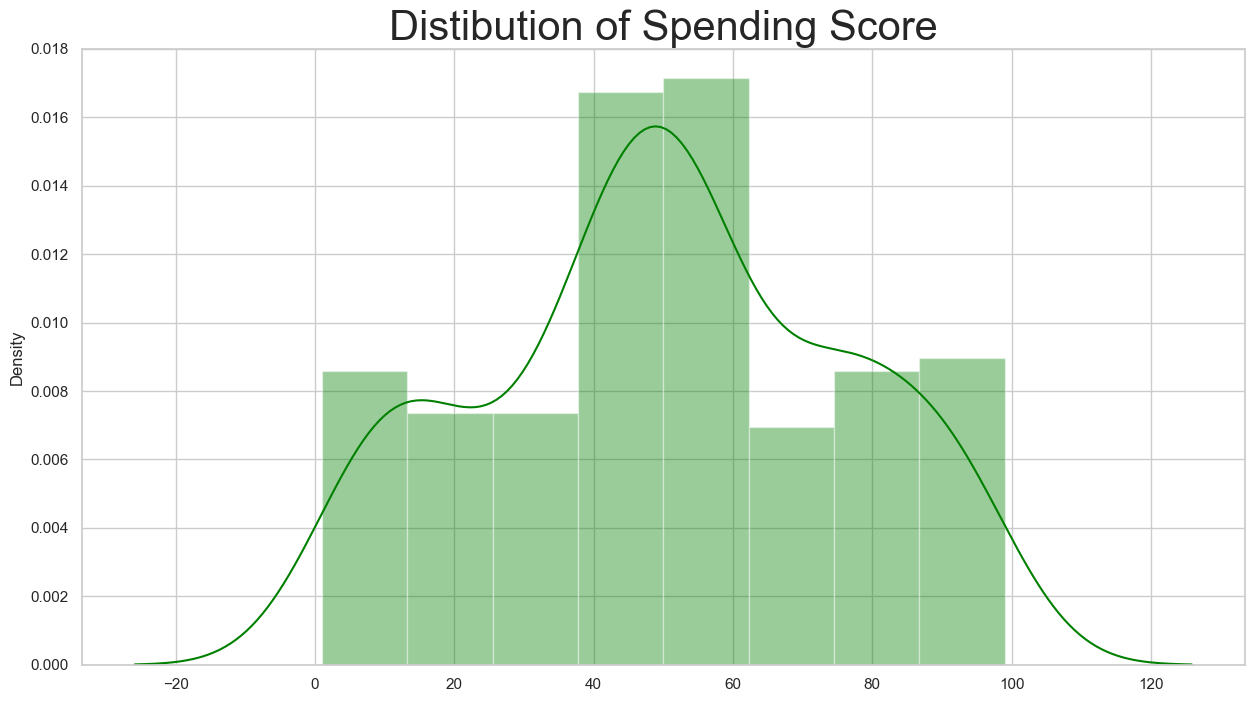

In [67]:
plt.figure(figsize = (15,8))
sns.distplot(x = df.SpendingScore, color = 'green')
plt.title('Distibution of Spending Score',fontsize = 30)
plt.show()

In [72]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


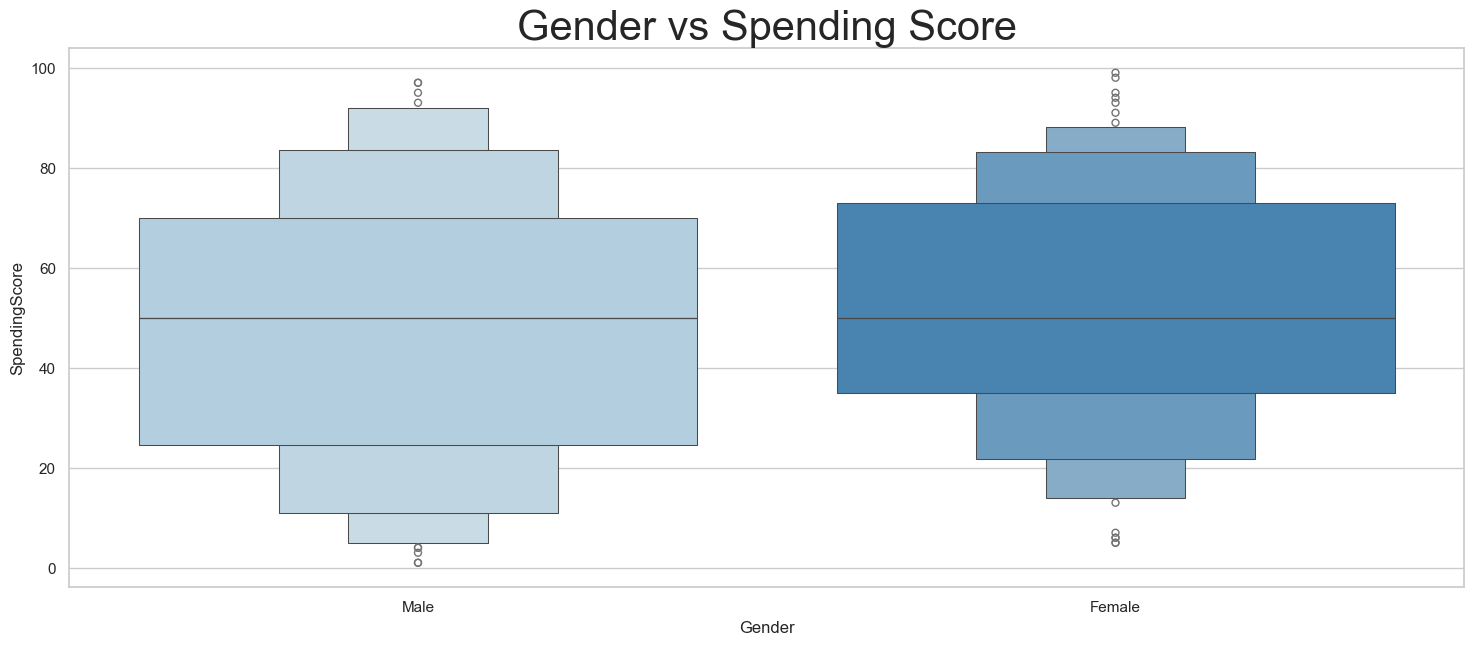

In [109]:
plt.figure(figsize = (18,7))
sns.boxenplot(x = df.Gender,y=df.SpendingScore,palette='Blues')
plt.title('Gender vs Spending Score',fontsize=30)
plt.show()

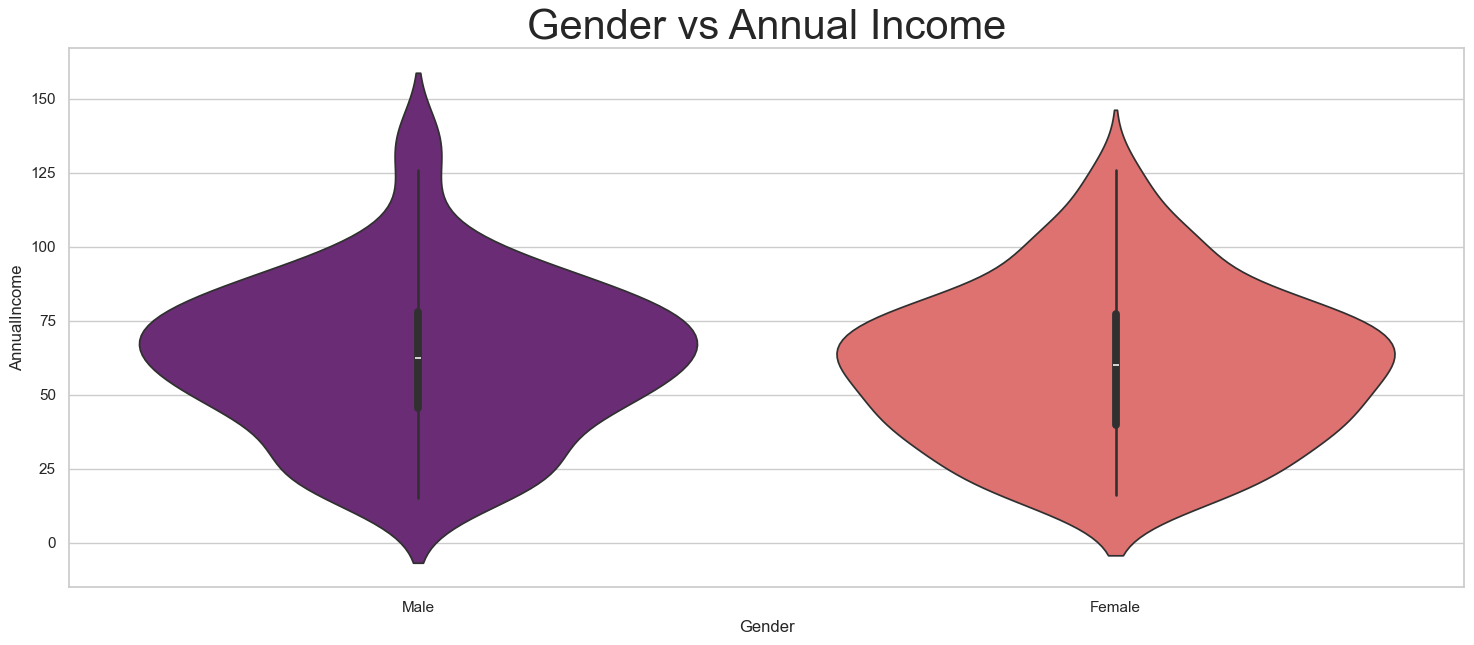

In [115]:
plt.figure(figsize = (18,7))
sns.violinplot(x = df.Gender,y=df.AnnualIncome,palette='magma')
plt.title('Gender vs Annual Income',fontsize=30)
plt.show()

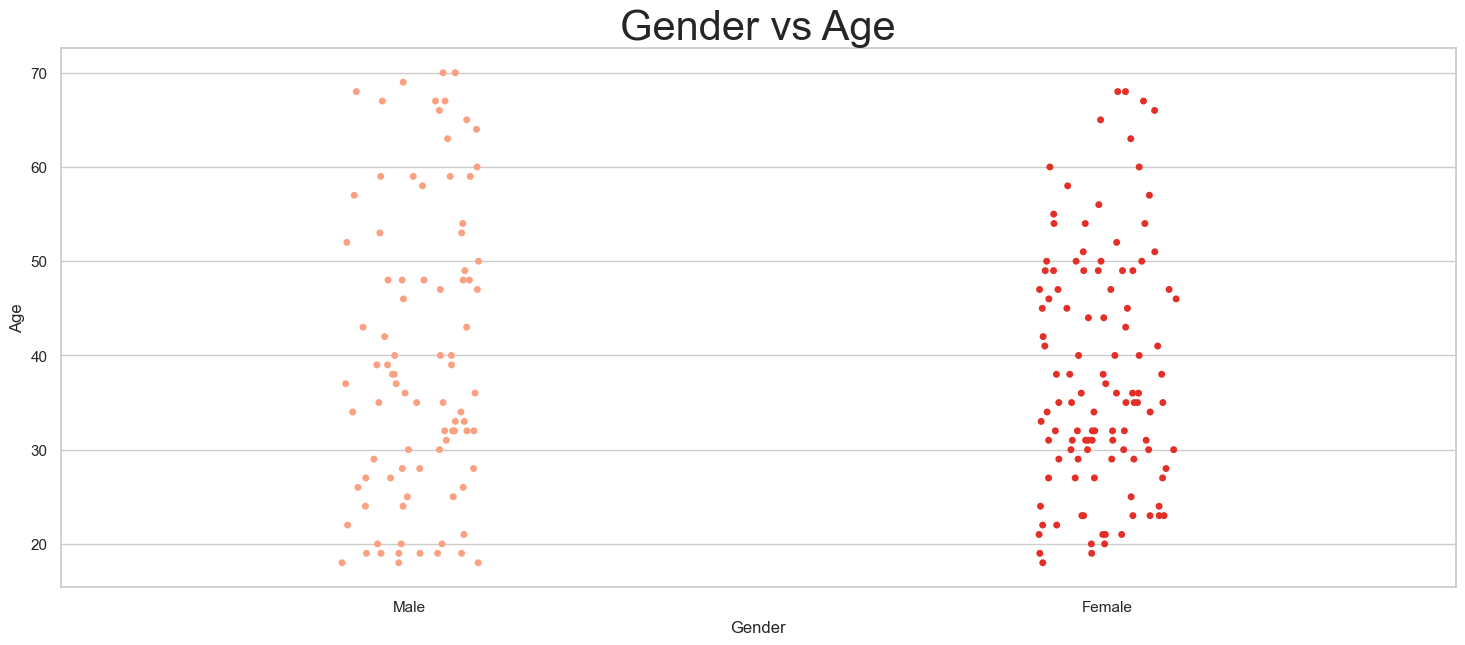

In [118]:
plt.figure(figsize = (18,7))
sns.stripplot(x = df.Gender,y=df.Age,palette='Reds')
plt.title('Gender vs Age',fontsize=30)
plt.show()

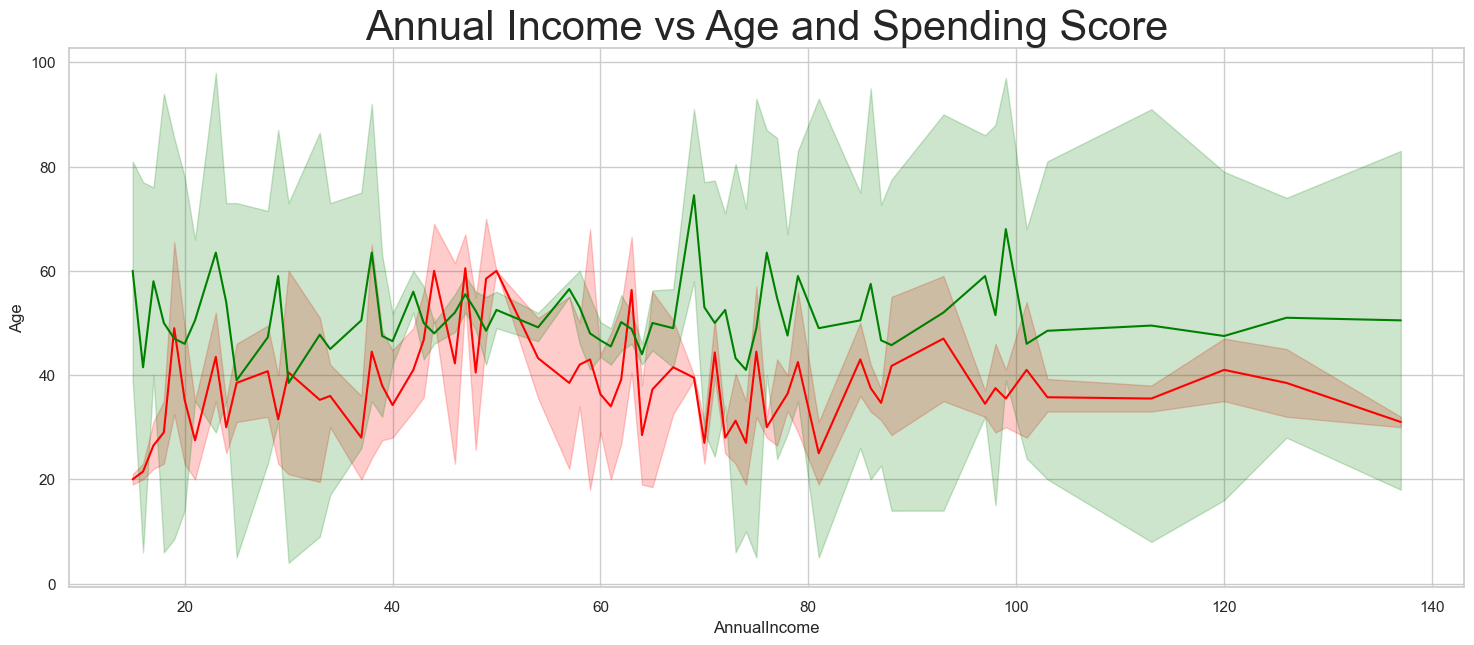

In [125]:
plt.figure(figsize = (18,7))
sns.lineplot(x = df.AnnualIncome,y=df.Age,color='red')
sns.lineplot(x = df.AnnualIncome,y=df.SpendingScore,color='green')
plt.title('Annual Income vs Age and Spending Score',fontsize=30)
plt.show()

## Clustering Analysis

In [126]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [133]:
x = df.loc[:,['SpendingScore','AnnualIncome']]
x.shape

(200, 2)

In [135]:
x.columns=[0,1]

In [136]:
x

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


## K-Means Algorithm

In [137]:
from sklearn.cluster import KMeans

In [138]:
wcss = [] #Within CLuster Sum of Squares
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    

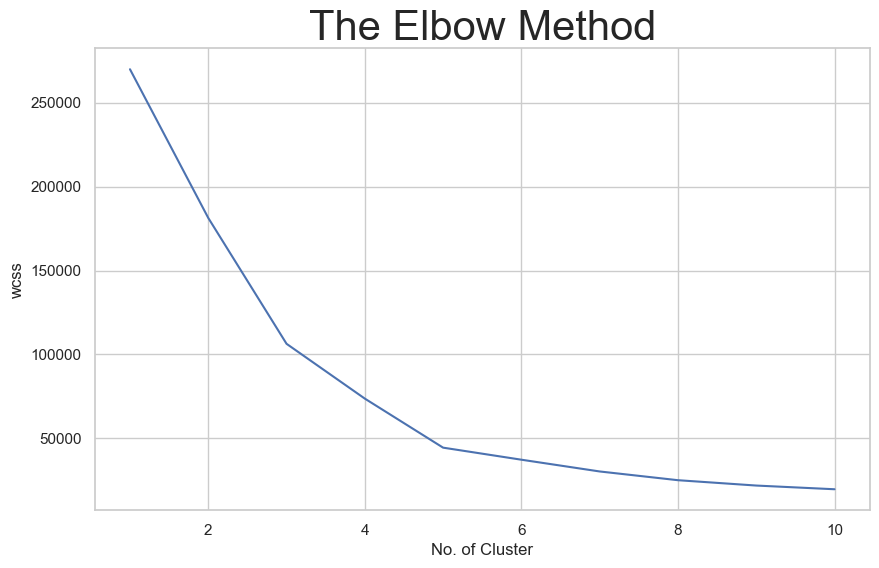

In [140]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=30)
plt.xlabel('No. of Cluster')
plt.ylabel('wcss')
plt.show()

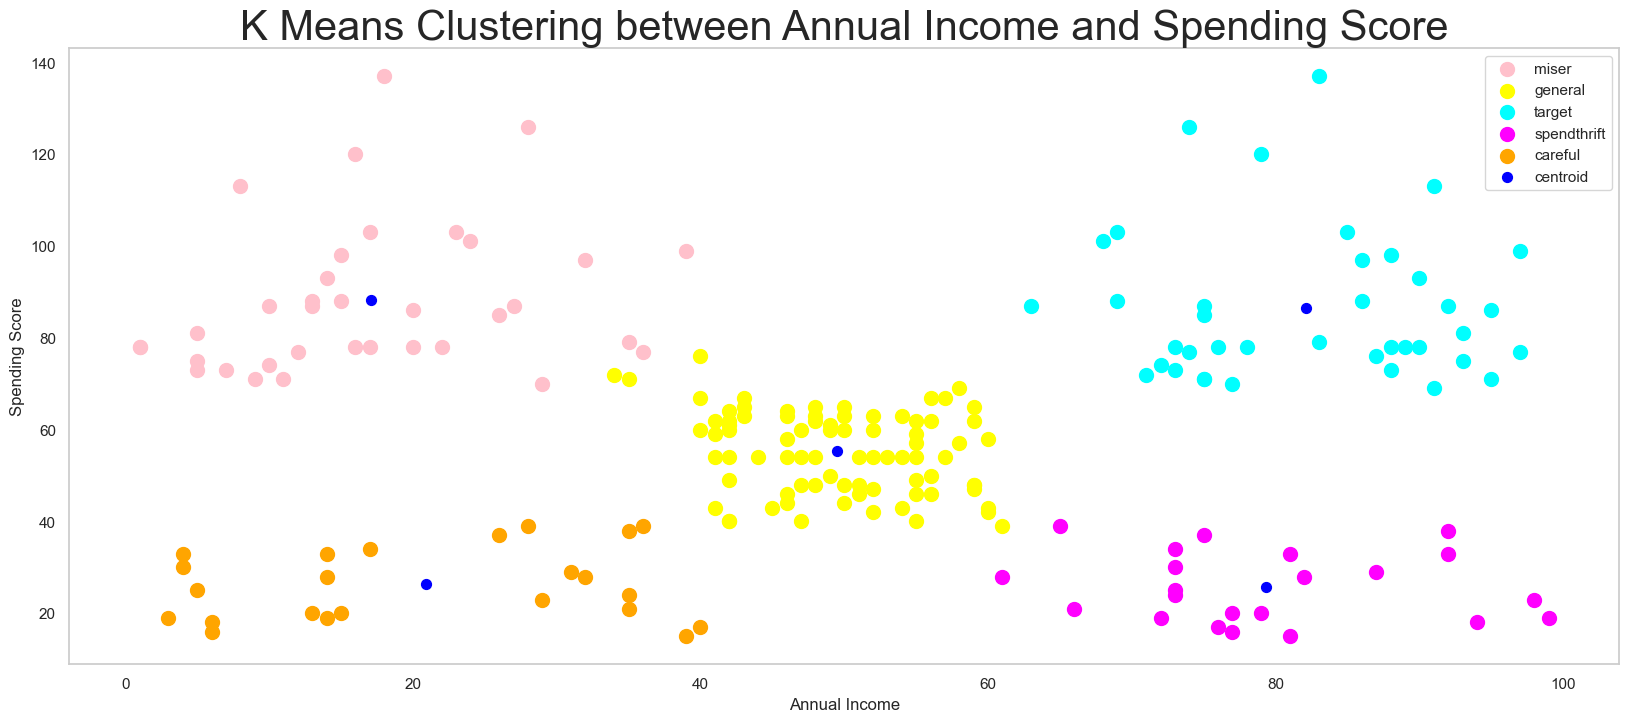

In [227]:
km = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize = (20,8))
plt.scatter(x[y_means == 2][0], x[y_means == 2][1],s=100,c='pink',label='miser')
plt.scatter(x[y_means == 0][0], x[y_means == 0][1],s=100,c='yellow',label='general')
plt.scatter(x[y_means == 1][0], x[y_means == 1][1],s=100,c='cyan',label='target')
plt.scatter(x[y_means == 4][0], x[y_means == 4][1],s=100,c='magenta',label='spendthrift')
plt.scatter(x[y_means == 3][0], x[y_means == 3][1],s=100,c='orange',label='careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=50,c='blue',label='centroid')

plt.title('K Means Clustering between Annual Income and Spending Score', fontsize=30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [218]:
wcss = [] #Within CLuster Sum of Squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

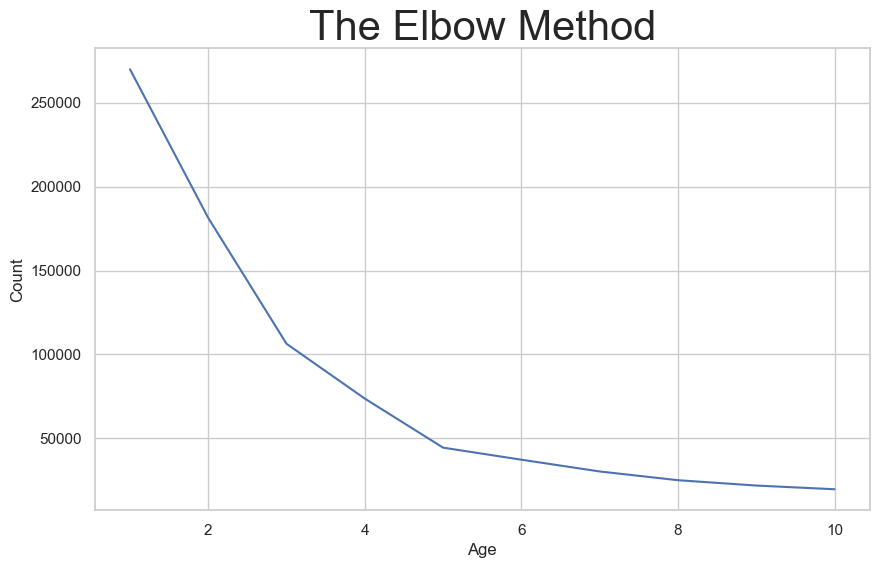

In [219]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

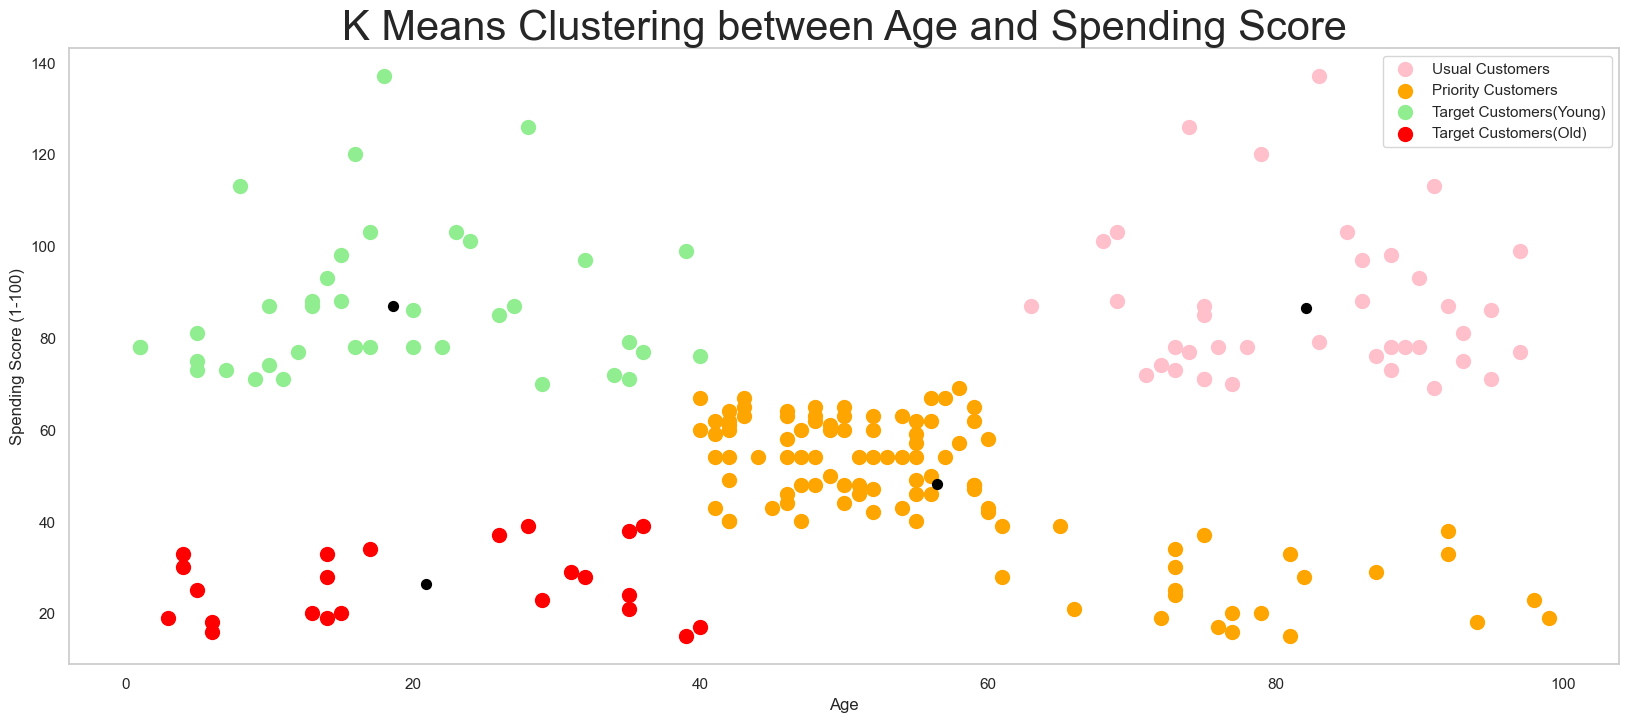

In [229]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize = (20,8))
plt.scatter(x[ymeans == 1][0], x[ymeans == 1][1],s=100,c='pink',label='Usual Customers')
plt.scatter(x[ymeans == 0][0], x[ymeans == 0][1],s=100,c='orange',label='Priority Customers')
plt.scatter(x[ymeans == 2][0], x[ymeans == 2][1],s=100,c='lightgreen',label='Target Customers(Young)')
plt.scatter(x[ymeans == 3][0], x[ymeans == 3][1],s=100,c='red',label='Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=50,c='black')

plt.title('K Means Clustering between Age and Spending Score', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()